<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Simple linear regression using least squares
© ExploreAI Academy

In this exercise, we create linear regression models, evaluate the fit of the model, and make predictions.


## Learning objectives

By the end of this train, we will:
- Know how to develop linear regression models in Python and make predictions.
- Know how to assess the performance of a linear regression model.

## Exercises

### Exercise 1

An environmental research group is examining how the average temperature of a day (in degrees Celsius) affects the energy output of solar panels (kWh produced). Your task is to visualise this relationship to determine if linear regression would be a suitable model.

1. Create two NumPy arrays named `average_temperature` and `solar_output` with the provided data.
2. Use `matplotlib` to create a scatter plot of average temperature (X-axis) against solar panel output (Y-axis).
3. Title your plot as "`Average temperature vs. Solar panel output`" and label the axes appropriately.
4. Based on the visualisation, assess whether linear regression is a suitable model for the data.


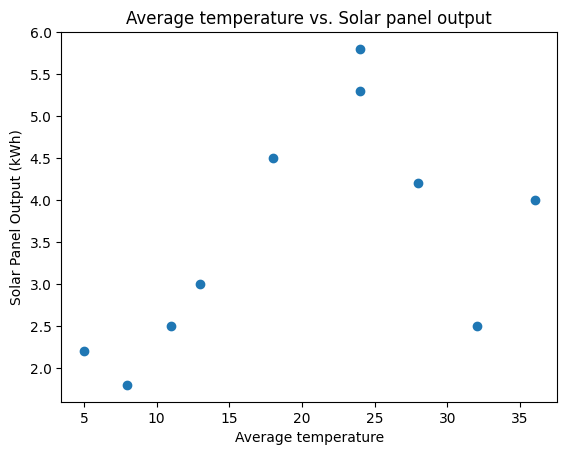

In [1]:
import numpy as np
import matplotlib.pyplot as plt


average_temperature = [5, 8, 11, 13, 18, 24, 24, 28, 32, 36]
solar_output = [2.2, 1.8, 2.5, 3.0, 4.5, 5.3, 5.8, 4.2, 2.5, 4.0]

# insert code here
avg_temp = np.array(average_temperature)
avg_solar_output = np.array(solar_output)

# use matplotlib to create  a scatter plot of average temperature and solar_output with the provided data
plt.scatter(avg_temp, avg_solar_output)

# labels and title
plt.xlabel('Average temperature')
plt.ylabel('Solar Panel Output (kWh)')
plt.title('Average temperature vs. Solar panel output')
plt.show()


### Exercise 2

The agricultural department is interested in predicting crop yield based on annual rainfall. You are tasked with creating a predictive model using simple linear regression.

1. Convert the provided lists into `NumPy` arrays named `annual_rainfall` and `agricultural_yield`.
2. Fit a simple linear regression model using sklearn's `LinearRegression`.
3. Predict the agricultural yield for a year with `1150` mm of annual rainfall.
4. Print the predicted yield.

In [2]:
annual_rainfall = [800, 1200, 1000, 1500, 1100, 1300, 900, 1400, 950, 1250]
agricultural_yield = [3.2, 4.8, 4.0, 5.5, 4.2, 5.0, 3.5, 5.3, 3.8, 4.9]

# insert code here
annual_rainfall = np.array(annual_rainfall)
agricultural_yield = np.array(agricultural_yield)



X = annual_rainfall.reshape(-1, 1)
Y = agricultural_yield

from sklearn.linear_model import LinearRegression
# Fit a simple linear regression model using sklearn's LinearRegression
model = LinearRegression()
model.fit(X,Y)

slope = model.coef_[0]
intercept = model.intercept_
print("slope:", slope)
print("intercept:", intercept)

slope: 0.0034264392324093807
intercept: 0.513859275053306


### Exercise 3

A city's environmental protection agency has collected data on daily traffic volume and air pollution levels. Your task is to evaluate the performance of a linear regression model that predicts air pollution levels from traffic volume.

1. Use the provided data to fit a simple linear regression model with `traffic_volume` as the independent variable and `pollution_levels` as the dependent variable.
2. Calculate the mean squared error (MSE) and R-squared value of your model.
3. Print the MSE and R-squared value, interpreting what they indicate about your model's performance.


In [11]:
traffic_volume = [1500, 2500, 2000, 3000, 3500, 1800, 4000, 2200, 2800, 3200]
pollution_levels = [35, 50, 45, 60, 65, 38, 70, 48, 55, 62]


# insert code here
traffic_volume = np.array(traffic_volume)
pollution_levels = np.array(pollution_levels)

X = traffic_volume.reshape(-1,1)
Y = pollution_levels

model = LinearRegression()
model.fit(X,Y)

slope = model.coef_[0]
intercept = model.intercept_

# For every 1 additional vehicle in traffic volume, the pollution level is predicted to increase by 0.0145 units.
print("slope", slope)
print("")
print(f"For every 1 additional vehicle in traffic volume, the pollution level is predicted to increase by {slope} units.")
print("")
print("")
print("")
print("")
# This is the "baseline." If there were 0 vehicles, the predicted pollution level would be 14.48 (perhaps due to background sources).
print("Intercept",intercept)
print("")
print(f"This is the 'baseline.' If there were 0 vehicles, the predicted pollution level would be {intercept} (perhaps due to background sources).")


from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X)
mse = mean_squared_error(Y ,predictions)
r_squared = r2_score(Y, predictions)


print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')


slope 0.014459102902374666

For every 1 additional vehicle in traffic volume, the pollution level is predicted to increase by 0.014459102902374666 units.




Intercept 14.483377308707134

This is the 'baseline.' If there were 0 vehicles, the predicted pollution level would be 14.483377308707134 (perhaps due to background sources).
Mean Squared Error: 2.51
R-squared: 0.98


## Solutions

### Exercise 1

- The average temperature and solar panel output data are converted into `NumPy` arrays for easy manipulation and plotting.
- `plt.scatter` creates a scatter plot with average temperature on the X-axis and solar panel output on the Y-axis.
- `plt.xlabel` and `plt.ylabel` label the axes, while `plt.title` adds a title to the plot.
- `plt.show()` displays the plot. The scatter plot is a crucial initial step in regression analysis as it helps identify the nature of the relationship between variables.

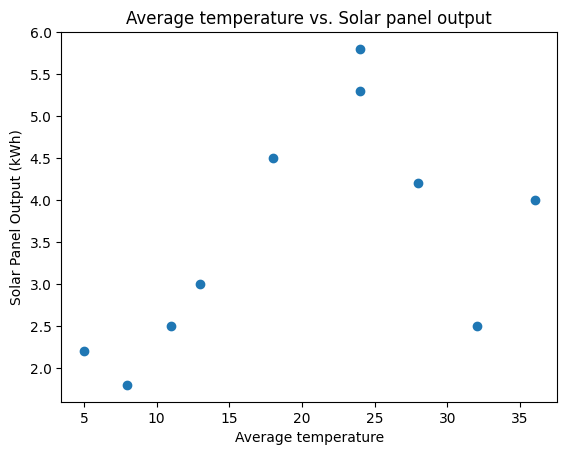

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data arrays
average_temperature  = np.array([5, 8, 11, 13, 18, 24, 24, 28, 32, 36])
solar_output = np.array([2.2, 1.8, 2.5, 3.0, 4.5, 5.3, 5.8, 4.2, 2.5, 4.0])

# Creating the scatter plot
plt.scatter(average_temperature , solar_output)
plt.xlabel('Average temperature')
plt.ylabel('Solar Panel Output (kWh)')
plt.title('Average temperature vs. Solar panel output')
plt.show()


Looking at the scatter plot, it seems that there is not a linear relationship between the average temperature of a day and the energy produced by solar panels. This could be because other factors that we haven't accounted for are having an impact on the energy produced, such as clouds. This means that a linear regression model will not be a good fit for our data.

### Exercise 2

- The code converts the lists of `annual_rainfall` and `agricultural_yield` into NumPy arrays for compatibility with sklearn's `LinearRegression` model. The `reshape(-1, 1)` is applied to annual rainfall to convert it from a 1D array to a 2D array because `sklearn` expects `X` (features) to be a 2D array.
- A `LinearRegression` model is instantiated and fitted to the data with `.fit()`, modelling the relationship between rainfall and yield.
- `.predict()` is used to estimate the yield for a specific value of rainfall (`1150` mm), demonstrating how the model can be used to make predictions based on new input data.
- The predicted yield is printed, providing actionable insights based on the model.

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data arrays
annual_rainfall = np.array([800, 1200, 1000, 1500, 1100, 1300, 900, 1400, 950, 1250]).reshape(-1, 1)
agricultural_yield = np.array([3.2, 4.8, 4.0, 5.5, 4.2, 5.0, 3.5, 5.3, 3.8, 4.9])

# Fitting the model
model = LinearRegression()
model.fit(annual_rainfall, agricultural_yield)

# Predicting for 1150 mm of annual rainfall
predicted_yield = model.predict(np.array([[1150]]))
print(f'Predicted agricultural yield for 1150 mm of annual rainfall: {predicted_yield[0]:.2f} tons per hectare')


Predicted agricultural yield for 1150 mm of annual rainfall: 4.45 tons per hectare


### Exercise 3

- The code first fits a linear regression model to the traffic volume and pollution level data (similar to the previous exercise).
- After fitting the model, it uses the model to predict pollution levels based on the observed traffic volumes.
- It calculates the mean squared error (MSE) and R-squared value using sklearn's `mean_squared_error `and `r2_score` functions. These metrics are essential for evaluating the performance of the regression model, helping to understand its accuracy and predictive power.
    - MSE provides a measure of the average squared difference between observed and predicted values, indicating the model's accuracy. A lower MSE indicates a better fit.
    - The R-squared value measures the proportion of the variance in the dependent variable that is predictable from the independent variable. It ranges from 0 to 1, with higher values indicating a better fit.


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data arrays
traffic_volume = np.array([1500, 2500, 2000, 3000, 3500, 1800, 4000, 2200, 2800, 3200]).reshape(-1, 1)
pollution_levels = np.array([35, 50, 45, 60, 65, 38, 70, 48, 55, 62])

# Fitting the model
model = LinearRegression()
model.fit(traffic_volume, pollution_levels)

# Making predictions
predictions = model.predict(traffic_volume)

# Calculating MSE and R-squared
mse = mean_squared_error(pollution_levels, predictions)
r_squared = r2_score(pollution_levels, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

Mean Squared Error: 2.51
R-squared: 0.98


#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>